In [1]:
from __future__ import absolute_import, division, print_function

import pathlib

import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df = pd.read_excel('Pecem_19.xlsx')
df.tail()

,Excesso_O2,T_out_coal_mill_A,Mill_A_classifier_velocity,Secondary_air_flow_A,Pressao_do_coletor_de_Ar_Secundario,Pressao_do_coletor_de_Ar_Primario,Flow_primary_air_Mill_A,Efficiency
6680,1.52760,78.22266,109.81761,72.08643,16.22159,89.27490,23.86728,84.827
6681,1.58930,78.22266,109.55209,71.19142,16.31651,88.74727,23.69873,84.845
6682,1.55646,78.22266,109.45068,71.10107,16.40381,88.99776,23.70218,84.905
6683,1.53290,78.22266,109.45068,71.16896,16.29375,88.91680,23.79477,84.439
6684,1.33080,78.22266,109.79638,71.37047,16.32463,88.32266,23.83669,84.346


In [3]:
train_dataset = df.sample(frac=0.9,random_state=0)
test_dataset = df.drop(train_dataset.index)
print(len(train_dataset), 'train examples')
print(len(test_dataset), 'test examples')

6016 train examples
669 test examples


In [4]:
train_stats = train_dataset.describe()
train_stats.pop("Efficiency")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Excesso_O2,6016.0,2.006851,0.380094,1.00100,1.742848,2.025145,2.299613,3.42856
T_out_coal_mill_A,6016.0,76.907425,2.371744,65.11230,75.292970,77.050780,78.810573,84.74708
Mill_A_classifier_velocity,6016.0,104.285563,2.501826,89.50849,103.532753,104.737790,105.228623,113.26989
Secondary_air_flow_A,6016.0,70.589192,2.614973,58.04786,68.881505,70.934225,72.463853,80.54581
Pressao_do_coletor_de_Ar_Secundario,6016.0,17.053473,1.311198,15.49751,16.245120,16.564305,17.514538,23.77950
Pressao_do_coletor_de_Ar_Primario,6016.0,77.443520,2.541434,75.01723,76.109352,76.389370,77.895480,90.98161
Flow_primary_air_Mill_A,6016.0,23.392522,0.735040,21.59901,22.885162,23.300675,23.697898,27.77773


In [5]:
train_labels = train_dataset.pop('Efficiency')
test_labels = test_dataset.pop('Efficiency')

In [6]:
def norm(x):
      return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [7]:
def build_model():
    model = keras.Sequential([
    layers.Dense(6, activation=tf.nn.tanh, input_shape=[len(train_dataset.keys())]),
    layers.Dropout(0.2),    
    layers.Dense(3, activation=tf.nn.relu),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [8]:
model = build_model()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 48        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [10]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result


array([[ 0.        ],
       [-0.16377608],
       [-0.00177043],
       [ 0.43903238],
       [-0.26363444],
       [-0.26349407],
       [-0.19850105],
       [-0.7683457 ],
       [-0.5824846 ],
       [ 0.        ]], dtype=float32)

In [11]:
# Display training progress by printing a single dot for each completed epoch

EPOCHS = 100

history = model.fit(
  normed_train_data.to_numpy(), train_labels.to_numpy(),
  epochs=EPOCHS, validation_split = 0.2)
  

Train on 4812 samples, validate on 1204 samples
Epoch 1/100
4812/4812 [==============================] - 1s 248us/sample - loss: 83.4946 - mae: 83.9946 - mse: 7057.6084 - val_loss: 83.2088 - val_mae: 83.7088 - val_mse: 7009.4375
Epoch 2/100
4812/4812 [==============================] - 0s 59us/sample - loss: 82.7462 - mae: 83.2462 - mse: 6932.6758 - val_loss: 82.3812 - val_mae: 82.8812 - val_mse: 6871.9077
Epoch 3/100
4812/4812 [==============================] - 0s 61us/sample - loss: 81.7525 - mae: 82.2525 - mse: 6768.9004 - val_loss: 81.1812 - val_mae: 81.6812 - val_mse: 6675.0122
Epoch 4/100
4812/4812 [==============================] - 0s 65us/sample - loss: 80.3596 - mae: 80.8596 - mse: 6542.8735 - val_loss: 79.5355 - val_mae: 80.0355 - val_mse: 6409.8110
Epoch 5/100
4812/4812 [==============================] - 0s 60us/sample - loss: 78.5600 - mae: 79.0600 - mse: 6257.1660 - val_loss: 77.4807 - val_mae: 77.9807 - val_mse: 6087.0054
Epoch 6/100
4812/4812 [============================

Epoch 47/100
4812/4812 [==============================] - 0s 62us/sample - loss: 8.5637 - mae: 9.0196 - mse: 145.7102 - val_loss: 2.1911 - val_mae: 2.6837 - val_mse: 8.3096
Epoch 48/100
4812/4812 [==============================] - 0s 59us/sample - loss: 8.5199 - mae: 8.9719 - mse: 146.9982 - val_loss: 2.1115 - val_mae: 2.6037 - val_mse: 7.9170
Epoch 49/100
4812/4812 [==============================] - 0s 61us/sample - loss: 8.5561 - mae: 9.0096 - mse: 143.8886 - val_loss: 2.0278 - val_mae: 2.5189 - val_mse: 7.5586
Epoch 50/100
4812/4812 [==============================] - 0s 77us/sample - loss: 8.6102 - mae: 9.0644 - mse: 143.7293 - val_loss: 2.1710 - val_mae: 2.6637 - val_mse: 8.2764
Epoch 51/100
4812/4812 [==============================] - 0s 81us/sample - loss: 8.2712 - mae: 8.7244 - mse: 134.9241 - val_loss: 1.9842 - val_mae: 2.4747 - val_mse: 7.2553
Epoch 52/100
4812/4812 [==============================] - 0s 82us/sample - loss: 8.4711 - mae: 8.9251 - mse: 142.3508 - val_loss: 2.130

4812/4812 [==============================] - 0s 62us/sample - loss: 5.0366 - mae: 5.4898 - mse: 51.7291 - val_loss: 1.2834 - val_mae: 1.7488 - val_mse: 4.0355
Epoch 95/100
4812/4812 [==============================] - 0s 60us/sample - loss: 4.9947 - mae: 5.4487 - mse: 51.2118 - val_loss: 1.2894 - val_mae: 1.7533 - val_mse: 4.0978
Epoch 96/100
4812/4812 [==============================] - 0s 60us/sample - loss: 4.9376 - mae: 5.3935 - mse: 50.0213 - val_loss: 1.0995 - val_mae: 1.5489 - val_mse: 3.3287
Epoch 97/100
4812/4812 [==============================] - 0s 60us/sample - loss: 4.8074 - mae: 5.2636 - mse: 48.1615 - val_loss: 1.0366 - val_mae: 1.4823 - val_mse: 3.0528
Epoch 98/100
4812/4812 [==============================] - 0s 61us/sample - loss: 4.6756 - mae: 5.1270 - mse: 45.6749 - val_loss: 1.0106 - val_mae: 1.4561 - val_mse: 2.9571
Epoch 99/100
4812/4812 [==============================] - 0s 59us/sample - loss: 4.4971 - mae: 4.9492 - mse: 42.3164 - val_loss: 0.9699 - val_mae: 1.4099

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,4.937615,5.393537,50.021290,1.099459,1.548924,3.328729,95
96,4.807366,5.263632,48.161476,1.036639,1.482283,3.052793,96
97,4.675568,5.127001,45.674870,1.010645,1.456100,2.957057,97
98,4.497060,4.949235,42.316357,0.969919,1.409855,2.803295,98
99,4.375853,4.827713,40.299377,0.977385,1.419650,2.828268,99


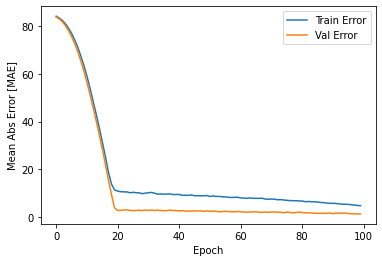

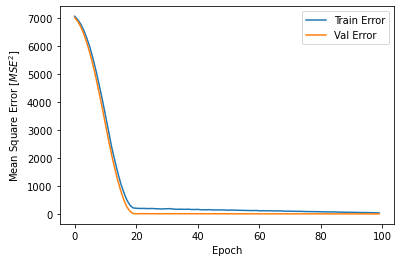

In [13]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MAE]')
    plt.plot(hist['epoch'], hist['mae'], # <- verificar se "mae" está na lista hist.keys() 
                                         #    (pode ser mean_absolute_error dependendo da versão do tf)
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.legend()
    #plt.ylim([0,100]) isso aqui força o limite no y, se não der 
    # o plt calcula automático

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MSE^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.legend()
    #plt.ylim([0,1000])

plot_history(history)

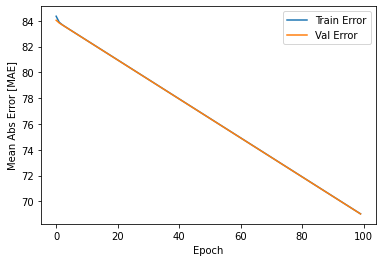

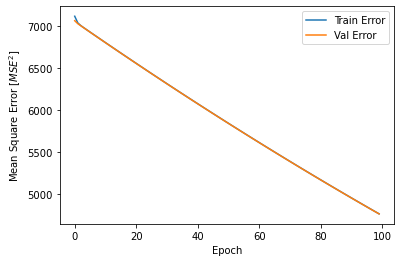

In [14]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop])

plot_history(history)

In [14]:
mean_absolute_percentage_error, mse, mae = model.evaluate(normed_train_data, train_labels, verbose=0)

print("MSE: {:5.5f}".format(mse))
print("MAE: {:5.5f}".format(mae))

MSE: 1.39662
MAE: 2.74371


In [15]:
mean_absolute_percentage_error, mse, mae = model.evaluate(normed_test_data, test_labels, verbose=0)

print("MSE: {:5.5f}".format(mse))
print("MAE: {:5.5f}".format(mae))

MSE: 1.36920
MAE: 2.67438


(78.14724999999999, 88.43774999999998, 76.01267967224119, 86.30317967224119)

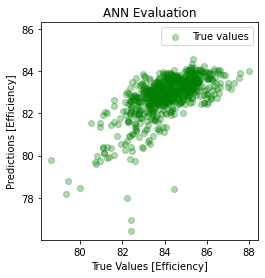

In [16]:
import matplotlib.pyplot as plt
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions, alpha = 0.3, c = 'g')
plt.title("ANN Evaluation")
plt.xlabel('True Values [Efficiency]')
plt.ylabel('Predictions [Efficiency]')
plt.legend(['True values', 'Predictions'], loc='upper right')
plt.axis('equal')
plt.axis('square')




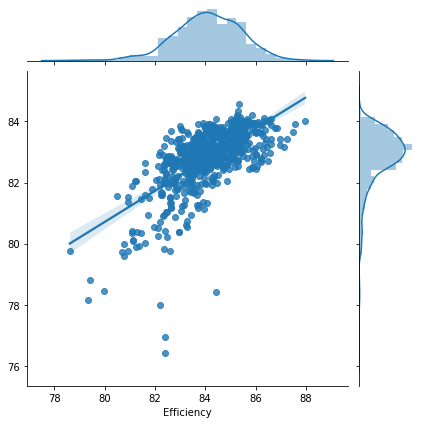

In [17]:
sns.jointplot(x=test_labels,y=test_predictions,kind='reg')

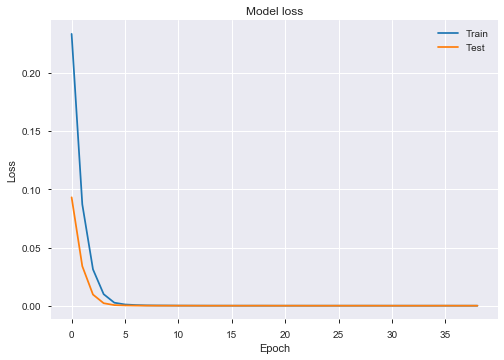

In [25]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

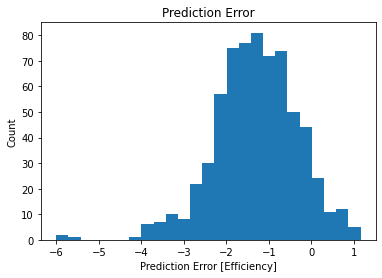

In [18]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.title("Prediction Error")
plt.xlabel("Prediction Error [Efficiency]")
_ = plt.ylabel("Count")

In [24]:
for x, y in zip(test_labels, test_predictions):
    print("%4.5f - %4.5f" % (x,y))

69.79776 - 69.55924
70.08264 - 69.64180
67.61748 - 68.73518
65.37945 - 66.90055
71.03833 - 69.70723
69.77560 - 69.06751
70.89498 - 68.96840
70.44484 - 69.09202
70.81002 - 69.02728
71.60054 - 69.55193
71.65122 - 68.92389
71.77966 - 68.91485
73.26889 - 69.80180
71.35031 - 59.63068
71.86737 - 65.07762
71.46214 - 65.34411
71.23718 - 67.02719
69.41713 - 70.69230
68.94959 - 68.28934
70.04261 - 68.76421
69.71785 - 68.86312
70.23108 - 68.70646
70.10446 - 68.28006
69.91161 - 68.56223
69.95011 - 68.67082
69.62527 - 68.37293
66.98256 - 48.25687
71.38196 - 70.67078
71.43028 - 70.80299
71.02487 - 70.88087
71.74727 - 70.74035
70.42616 - 69.48386
72.77426 - 71.39640
72.71913 - 71.33442
72.47865 - 71.37453
72.61464 - 71.28307
72.91739 - 71.10065
73.21869 - 70.82975
73.37590 - 70.84573
73.44370 - 70.84080
73.00803 - 70.61883
72.50582 - 70.39533
72.89907 - 70.75198
73.09064 - 70.44012
73.42997 - 70.39232
69.32052 - 67.14659
71.19510 - 70.22103
71.29406 - 69.84504
71.35470 - 70.21999
71.66201 - 70.23851


In [19]:
new_inputs = pd.read_excel('pecem_18_2.xlsx')
new_inputs

,Excesso_O2,T_out_coal_mill_A,Mill_A_classifier_velocity,Secondary_air_flow_A,Pressao_do_coletor_de_Ar_Secundario,Pressao_do_coletor_de_Ar_Primario,Flow_primary_air_Mill_A,Efficiency
0,3.001729,79.902627,72.364253,83.966813,20.523773,78.874757,25.645858,74.877005
1,2.427341,79.070757,72.509941,82.475396,18.683836,79.907639,25.535946,74.576367
2,2.391721,79.216494,72.826390,81.311747,17.878351,79.916634,25.453128,75.600035
3,2.373436,79.052734,72.351163,82.624173,18.232207,80.416181,25.715812,75.115318
4,2.560611,79.056067,72.378753,83.779932,18.800319,79.862623,25.527302,75.304531
...,...,...,...,...,...,...,...,...
2710,3.311741,65.512292,103.999836,82.577429,18.016176,85.580314,22.843026,70.951371
2711,3.225974,65.808884,104.002094,82.262888,17.873719,85.056291,22.815615,71.173679
2712,3.257794,66.281206,103.946535,82.215608,17.928743,84.842473,22.816798,70.946039
2713,3.215371,66.284180,104.005314,82.109817,18.969089,85.079287,22.767497,71.135743


In [20]:
new_dataset= new_inputs.drop('Efficiency', axis = 1)

In [21]:
new_train_stats = new_inputs.describe()
new_train_stats.pop("Efficiency")
new_train_stats = new_train_stats.transpose()

In [22]:
def new_norm(y):
    return (y - new_train_stats['mean'])/new_train_stats['std']

In [23]:
new_ds_ff = new_norm(new_dataset)

In [24]:
new_y=model.predict(new_ds_ff.to_numpy()).flatten()

In [25]:
print(*new_y, sep = "\n") 

83.28023
83.39842
83.36507
83.23448
83.34555
83.32444
83.334206
83.414375
83.366486
83.303085
83.27329
83.34569
83.37285
83.32582
83.10778
83.127754
83.16641
83.18296
83.088524
83.31853
83.514786
83.57452
83.49973
83.692024
83.60968
83.54064
83.474144
83.42589
83.34774
83.33985
83.396484
83.531265
83.509094
83.61667
83.73104
83.53415
83.52428
83.46461
83.29477
83.26439
83.31049
83.2971
83.07576
83.185555
83.52105
83.609375
83.76926
83.72049
83.62113
83.66383
83.6558
83.64077
83.61073
83.64211
83.69114
83.7002
83.69701
83.77353
83.720024
83.58404
83.55518
83.463776
83.52024
83.54327
83.62496
83.6442
83.60174
83.61
83.63998
83.6228
83.74087
83.754364
83.70634
83.64457
83.496735
83.60563
83.5415
83.533516
83.55244
83.546684
83.65493
83.37661
83.37212
83.41969
83.35812
83.370445
83.43125
83.368126
83.42416
83.3815
83.39238
83.477684
83.47105
83.37392
83.34735
83.295784
83.229675
83.29754
83.370575
83.36869
83.52301
82.67141
82.74177
82.97636
82.74766
82.71843
82.90479
82.9412
82.87401
82.6

83.791504
83.92179
83.87335
83.53631
83.65514
83.709175
83.546074
82.864365
82.886375
82.89855
82.88352
82.90951
82.94176
82.984924
83.08171
83.17644
83.23168
83.179474
83.134384
83.25237
83.24812
83.202324
83.18096
83.11917
83.11727
83.20082
83.267944
83.18254
83.28482
83.201584
83.14717
83.10029
83.021225
83.082085
83.13356
83.12583
83.22533
83.14352
82.83813
82.08526
81.87156
81.859665
81.783554
82.13648
82.41073
82.55885
82.55656
82.6055
82.54803
82.37138
82.38183
82.44796
82.37192
82.51693
82.61322
82.63563
82.60934
82.67935
82.681435
82.74763
82.926384
82.724236
82.64116
82.55538
82.04908
82.2038
82.29168
82.313065
82.04036
82.23321
82.27586
82.30834
82.362114
82.4655
82.44842
82.44231
82.4306
82.49163
82.582306
82.52299
82.55743
82.639175
82.60242
82.448685
82.38618
82.252304
82.180046
82.085075
82.1154
82.17712
82.28763
82.18311
82.16666
82.20479
82.155426
82.21104
82.10855
82.28051
82.02927
82.0996
82.12086
82.10624
82.10139
82.66095
82.882324
82.997314
83.135124
83.07625
83.0

In [28]:
test= pd.read_excel('pecem_18_2.xlsx')
real = test['Efficiency']

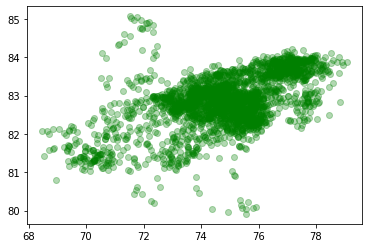

In [29]:
plt.scatter(real, new_y, alpha = 0.3, c = 'g')

In [30]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
rmse = np.sqrt(mean_squared_error(real, new_y))
mae = mean_absolute_error(real, new_y)
r2 = r2_score(real, new_y)

print("MAE: %f" % (mae))
print("RMSE: %f" % (rmse))
print("R2: %f" % (r2))

MAE: 8.075492
RMSE: 8.234981
R2: -18.340790
